In [1]:
__nbid__ = '0016'
__author__  = 'Mike Fitzpatrick <mike.fitzpatrick@noirlab.edu>, Glenn Eychaner, Robert Nikutta <robert.nikutta@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205'
__datasets__ = ['sdss_dr16']
__keywords__ = ['file service','vospace']

# Cómo usar los servicios públicos de archivos de Data Lab

_Mike Fitzpatrick, Glenn Eychaner, Robert Nikutta_

#### (_Traducción de [How_to_use_the_File_Services.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/FileService/How_to_use_the_File_Services.ipynb)_)

# Tabla de contenido

* [Resumen del notebook](#summary)
* [Avisos legales y atribuciones](#disclaimer)
* [Importaciones y configuración](#imports)
* [Autenticación](#auth)
* [Listar la carpeta 'public/' de otro usuario en su vospace](#listing-public)
* [Un ejemplo usando el servicio público de archivos de SDSS DR16](#example-file-service)
* [Listar todos los espacios públicos de archivos disponibles](#list-file-services)

<a class="anchor" id="summary"></a>
# Resumen del notebook

Los archivos en el almacenamiento virtual normalmente se identifican mediante el prefijo `vos://`. Este identificador abreviado se resuelve en el directorio base del usuario dentro del espacio de almacenamiento en el servicio.  

Si el prefijo `vos://` es en cambio el nombre de otro usuario (p. ej. `demo00://`), y el resto de la ruta otorga acceso público o de grupo de lectura/escritura, entonces se accederá a los espacios del otro usuario. La mayoría de los espacios de usuario tienen un directorio `/public` para facilitar el intercambio de archivos (p. ej. `demo00://public/foo.fits` accederá al archivo `foo.fits` del usuario `demo00`). Los usuarios pueden hacer cualquier archivo (o directorio) público moviéndolo (o creando un enlace) a su directorio `/public`.

Los _servicios públicos de archivos_ son áreas creadas especialmente donde todos los archivos son legibles por cualquier persona, y se utilizan para servir archivos de los conjuntos de datos de Data Lab.

<a class="anchor" id="attribution"></a>

# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="imports"></a>
# Importaciones y configuración

In [2]:
# Importaciones de terceros
from getpass import getpass
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits

# Importaciones DL estándar, tenga en cuenta que solo necesitamos storeClient y posiblemente authClient
from dl import storeClient as sc, authClient as ac

# Hacer el graficado matplotlib en línea
%matplotlib inline

<a class="anchor" id="auth"></a>
# Autenticación

Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Pero algunas capacidades, por ejemplo guardar los resultados de sus consultas en su espacio de almacenamiento virtual, requieren un inicio de sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
# token = ac.login(input("Ingrese el nombre de usuario: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))
ac.whoAmI()

<a class="anchor" id="listing-public"></a>
# Listar la carpeta 'public/' de otro usuario en su vospace
El usuario en nuestro ejemplo es 'demo00'

In [3]:
print(sc.ls('demo00://public',format='short'))

test2.csv       test3.csv       test6.csv        



<a class="anchor" id="example-file-service"></a>
# Un ejemplo que utiliza el servicio de archivos públicos **SDSS DR16**.
Un 'servicio de archivos' es un voespacio _público_, legible por todos los usuarios.

## Establecer directorio base y número de placa

In [4]:
# Establecer el directorio base y el número de placa.
# Estos se pueden encontrar explorando el espacio SDSS DR16 usando 'sc.ls()'
print(sc.ls('sdss_dr16://'))
print(sc.ls('sdss_dr16://eboss'))
print(sc.ls('sdss_dr16://eboss/spectro'))
print(sc.ls('sdss_dr16://eboss/pectro/redux'))

base = 'sdss_dr16://eboss/spectro/redux/v5_13_0/'
plate = '3615'

apo,apogee,eboss,env,lco,manga,marvels,public,sdss,tmp
calib,elg,lss,lya,photo,photoObj,qso,resolve,spectro,spiders,sweeps,target
data,firefly,lensing,redux
Error 404: "sdss_dr16://eboss/pectro/redux" NOT FOUND


## Enumere todos los archivos de placas FITS disponibles en el directorio de placas

In [5]:
# Construya la ruta vospace al directorio de la placa.
spPlate = base + plate + '/spPlate-' + plate
print(sc.ls(spPlate + '*.fits',format='short'))

spPlate-3615-55089.fits  spPlate-3615-55099.fits  spPlate-3615-55145.fits
spPlate-3615-55153.fits  spPlate-3615-55179.fits  spPlate-3615-55208.fits
spPlate-3615-55445.fits  spPlate-3615-55856.fits  spPlate-3615-56219.fits
spPlate-3615-56544.fits                            



## Elija un fecha juliana modificada y fibra

In [6]:
mjd = '56544'
fiber = 39

# Construya la ruta vospace al archivo de placa y verifique
spfile = spPlate + '-' + mjd + '.fits'
print('Archivo:',spfile)
print(sc.ls(spfile))

Archivo: sdss_dr16://eboss/spectro/redux/v5_13_0/3615/spPlate-3615-56544.fits
spPlate-3615-56544.fits


## Ahora lea el espectro del archivo y construya la matriz de longitudes de onda.

In [7]:
try:
    with fits.open(sc.get(spfile, mode='fileobj')) as hdulist:
        hdr = hdulist[0].header
        flux = hdulist[0].data[fiber-1, :]
        ivar = hdulist[1].data[fiber-1, :]
        sky = hdulist[6].data[fiber-1, :]
except Exception as e:
    raise ValueError("No se encuentra el archivo spPlate para la placa={0:s}, mjd={1:s}!".format(plate, mjd))

loglam = hdr['COEFF0'] + hdr['COEFF1']*np.arange(hdr['NAXIS1'], dtype=flux.dtype)
wavelength = 10.0**loglam
print("Número de elementos en las matrices de flujo, ivar y longitud de onda: {} {} {}".format(len(flux),len(ivar),len(wavelength)))

Número de elementos en las matrices de flujo, ivar y longitud de onda: 4646 4646 4646


## Haz una gráfica del espectro.

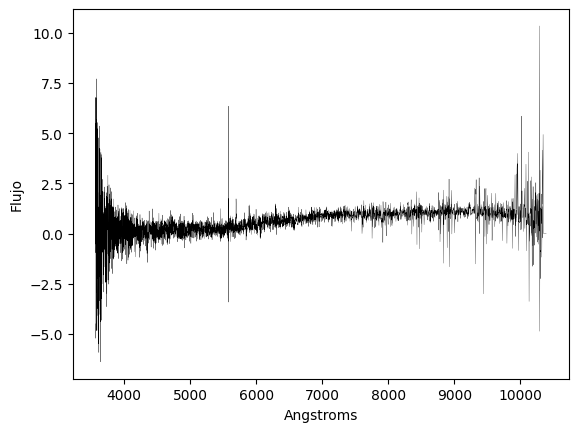

In [8]:
plt.plot(wavelength, flux * (ivar > 0), 'k', lw=0.2)
plt.xlabel('Angstroms')
plt.ylabel('Flujo');

<a class="anchor" id="list-file-services"></a>
## Listar todos los espacios de archivos públicos disponibles

La función `sc.services()` permite al usuario enumerar todos los servicios de archivos disponibles.

In [9]:
print(sc.services())


                    name   svc   description
                --------   ----  --------
                     lmc   vos   SuperMACHO Survey
                 chandra   vos   ChaMPlane: Measuring the Faint X-ray Bin ...
             cosmic_dawn   vos   Cosmic DAWN survey
               deeprange   vos   Deeprange Survey
           deep_ecliptic   vos   Deep Ecliptic Survey
                 des_dr2   vos   Dark Energy Survey DR2
                desi_ets   vos   DESI Early Target Selection
                     dls   vos   Deep Lens Survey
                  flamex   vos   FLAMINGOS Extragalactic Survey
                     fls   vos   First Look Survey
                    fsvs   vos   Faint Sky Variability Survey
               gnirs_dqs   vos   Gemini Near-IR Spectroscopic-Distant Qua ...
               ir_bootes   vos   Infrared Bootes Imaging Survey
                     lgs   vos   Local Group Survey
             gogreen_dr1   vos   GOGREEN DR1 Survey
             gogreen_dr2   vos   GOGR